In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
st = pd.read_csv("50_Startups.csv")
st.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
sf=st.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)

In [4]:
sd=sf.drop(['State'], axis = 1)

In [5]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   ad      50 non-null     float64
 2   ms      50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
sd.isna().sum()

rd        0
ad        0
ms        0
Profit    0
dtype: int64

# Correlation Matrix

In [7]:
sd.corr()

,rd,ad,ms,Profit
rd,1.000000,0.241955,0.724248,0.972900
ad,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

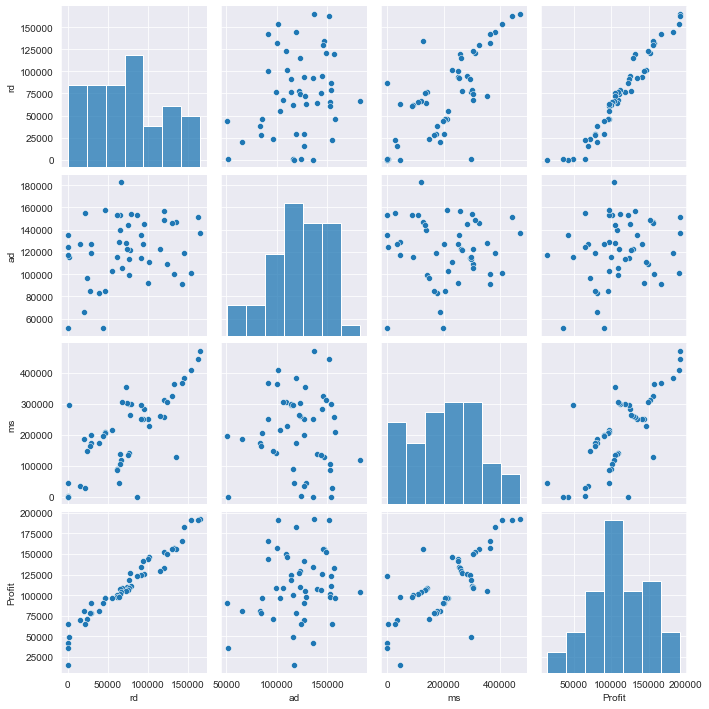

In [8]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(sd)

# Preparing a model

In [9]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~rd+ad+ms',data=sd).fit()

In [10]:
#Coefficients
model.params

Intercept    50122.192990
rd               0.805715
ad              -0.026816
ms               0.027228
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
rd           17.846374
ad           -0.525507
ms            1.655077
dtype: float64 
 Intercept    1.057379e-09
rd           2.634968e-22
ad           6.017551e-01
ms           1.047168e-01
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj,model.aic)

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

# Predicting For the New Data

In [13]:
#New data for prediction
new_data=pd.DataFrame({'rd':165444,"ad":90000,"ms":300000},index=[1])

In [16]:
model.predict(new_data)

1    189177.895993
dtype: float64